### Análise de Popularidade de Grupos de Kpop no Spotify Brasil

In [ ]:
%pip install palettable

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import warnings
warnings.filterwarnings('ignore')

In [42]:
with open("json_data_files/kpop_groups.json", "r", encoding="utf-8") as file:
    kpop_groups = json.load(file)

with open ("json_data_files/kpop_popularity_br.json", "r", encoding="utf-8") as file:
    kpop_groups_popularity = json.load(file)

### Top 15 Grupos mais Populares

In [52]:
# converter dados para Pandas DataFrame
groups_fr = pd.DataFrame(kpop_groups_popularity)

groups_fr.head(15)

,name,popularity,company,concert in brazil
0,NewJeans,72.1,N/A,no
1,Stray Kids,71.2,JYP Entertainment,yes
2,BTS,70.6,HYBE,yes
3,LE SSERAFIM,69.4,HYBE,no
4,BABYMONSTER,68.8,YG Entertainment,no
5,aespa,68.0,SM Entertainment,yes
6,ENHYPEN,67.4,HYBE,no
7,BLACKPINK,66.6,YG Entertainment,no
8,IVE,66.3,Starship Entertainment,yes
9,TWICE,65.9,JYP Entertainment,yes


In [53]:
# filtro para grupos que já fizeram show no Brasil
groups_concert = groups_fr[groups_fr["concert in brazil"] == "yes"]
groups_concert.head()

,name,popularity,company,concert in brazil
1,Stray Kids,71.2,JYP Entertainment,yes
2,BTS,70.6,HYBE,yes
5,aespa,68.0,SM Entertainment,yes
8,IVE,66.3,Starship Entertainment,yes
9,TWICE,65.9,JYP Entertainment,yes


Text(0.5, 1.0, 'Top 15 Grupos de Kpop mais Populares no Spotify Brasil')

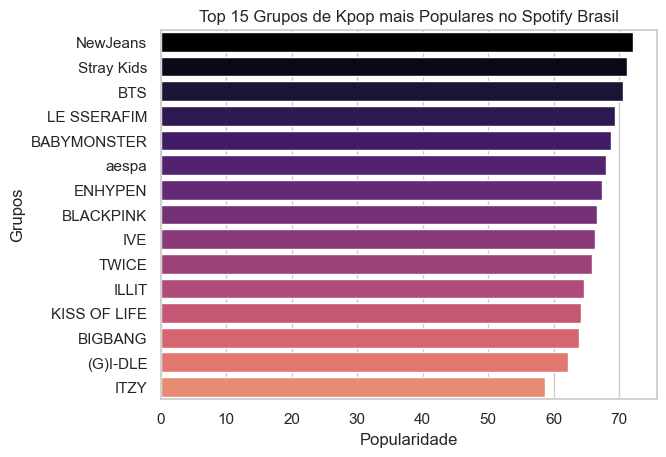

In [60]:
from palettable.matplotlib import Magma_20


sns.barplot(x= "popularity", y="name", data=groups_fr.head(15), palette= Magma_20.mpl_colors)
plt.xlabel("Popularidade")
plt.ylabel("Grupos")
plt.title("Top 15 Grupos de Kpop mais Populares no Spotify Brasil")

### Análise por Gênero - Boygroups e Girlgroups 

In [4]:
with open("json_data_files/popular_girlgroups.json", "r", encoding="utf-8") as file:
    girlgroups = json.load(file)
    
with open("json_data_files/popular_boygroups.json", "r", encoding="utf-8") as file:
    boygroups = json.load(file)
    
girlgroups_df = pd.DataFrame(girlgroups)
boygroups_df = pd.DataFrame(boygroups)

gg_df= girlgroups_df.sort_values(by="popularity", ascending=False)
bg_df= boygroups_df.sort_values(by="popularity", ascending=False)

In [5]:
gg_df.head(11)

,name,popularity
0,New Jeans,72.1
1,Lesserafim,69.4
2,BABYMONSTER,68.8
3,aespa,68.0
4,BLACKPINK,66.6
5,IVE,66.3
6,TWICE,65.9
7,ILLIT,64.6
8,KISS OF LIFE,64.1
9,(G)I-DLE,62.2


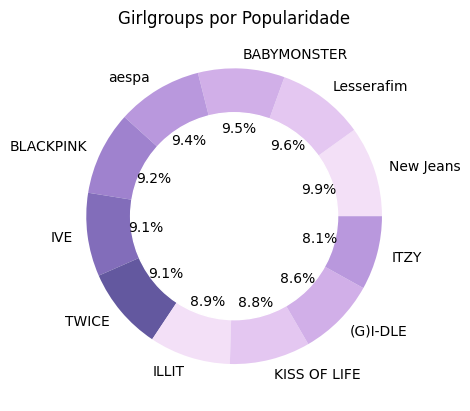

In [35]:
from palettable.cartocolors.sequential import Purp_7

plt.pie(gg_df['popularity'], labels=gg_df['name'], autopct='%1.1f%%', colors=Purp_7.hex_colors)
plt.title("Girlgroups por Popularidade")


#center circle
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.show()

In [6]:
bg_df.head()

,name,popularity
0,Stray Kids,71.2
1,BTS,70.6
2,ENHYPHEN,67.4
3,BIGBANG,63.9


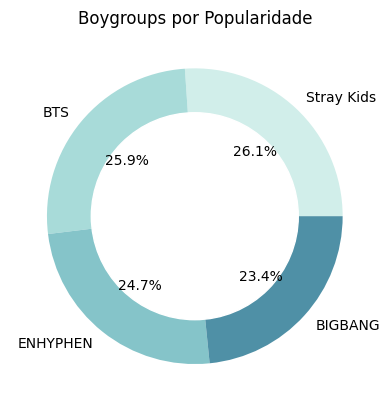

In [34]:
from palettable.cartocolors.sequential import Teal_6

plt.pie(bg_df['popularity'], labels=bg_df['name'], autopct='%1.1f%%', colors=Teal_6.hex_colors)
plt.title("Boygroups por Popularidade")


#center circle
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.show()